Created by [SmirkyGraphs](http://smirkygraphs.github.io/). Code: [GitHub](https://github.com/SmirkyGraphs/Python-Notebooks). Source: [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).
<hr>

## Introduction

### Index

1) [Introduction](#Introduction)

- Index
- Import Libraries
- Load data
- Variable Details/Summary

2) [Correlation](#Correlation)

- Correlation of All Values
- Correlation with Target Variable

3) [Visualisations](#Visualisations)

- Values
- Categories

4) [Missing Values](#missing)

- Figure out missing value columns
- Fill out missing values

5) [Predicting](#predicting)

- Encode categories
- Split train/test
- Predicting prices
- Exporting predictions

### Importing Libraries

In [1]:
# For Data
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
my_color = sns.color_palette()
sns.set_style('darkgrid')
sns.set()

### Loading the Data

In [2]:
df = pd.read_csv('train.csv')

### Variable Details

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

We have 1460 samples made of 80 features and 1 target variable that is the SalePrice to work with

In [5]:
test = pd.read_csv('test.csv')

In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test.shape

(1459, 80)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
# Statistical Summary of Target
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [11]:
# Statistical Summary
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<hr>

## Correlation

### Correlation of All Variables

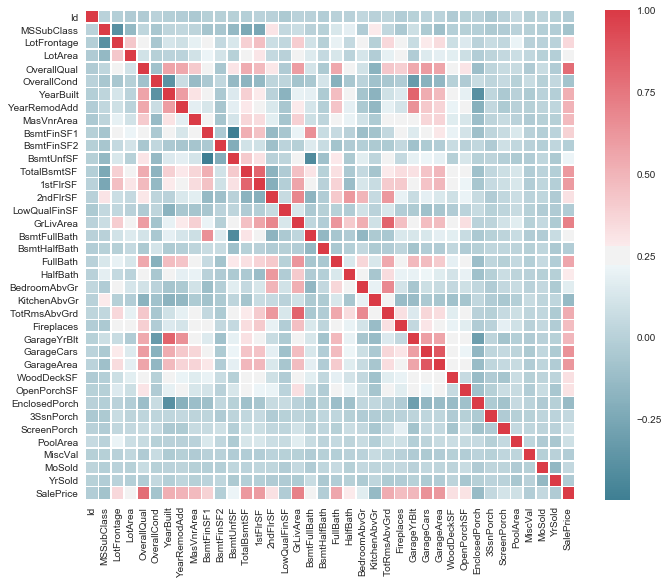

In [12]:
# Compute the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, cmap=cmap, vmax=1, square=True, linewidths=.5)

### Correlation With Target Variable

In [13]:
corr = df.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

# Top 35 Features
corr.sort_values(ascending=False).head(35)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
ScreenPorch     0.111447
PoolArea        0.092404
MoSold          0.046432
3SsnPorch       0.044584
BsmtFinSF2     -0.011378
BsmtHalfBath   -0.016844
MiscVal        -0.021190
Id             -0.021917
LowQualFinSF   -0.025606
YrSold         -0.028923
OverallCond    -0.077856
Name: SalePrice, dtype: float64

<hr>

## Visualisations

###  Values Visualizations

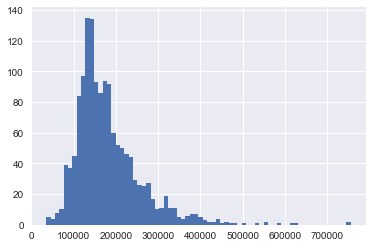

In [14]:
df['SalePrice'].hist(bins=70)

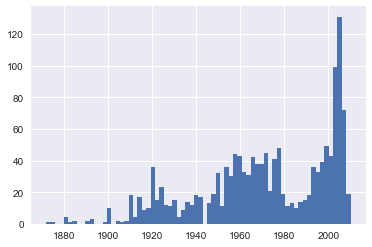

In [15]:
df['YearBuilt'].hist(bins=70)

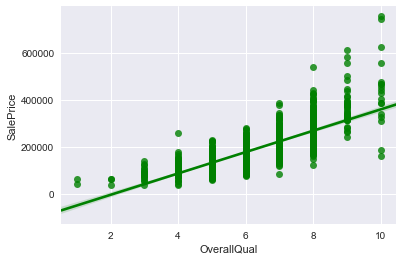

In [16]:
sns.regplot(x = 'OverallQual', y = 'SalePrice', data = df, color = 'g')

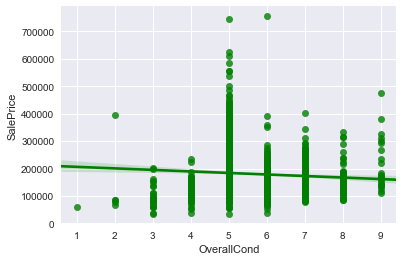

In [17]:
sns.regplot(x = 'OverallCond', y = 'SalePrice', data = df, color = 'g')

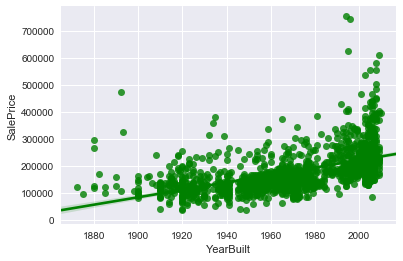

In [18]:
sns.regplot(x = 'YearBuilt', y = 'SalePrice', data = df, color = 'g')

In [19]:
# Getting Price per Sqrft
df['PricePrSF'] = df['SalePrice']/df['GrLivArea']

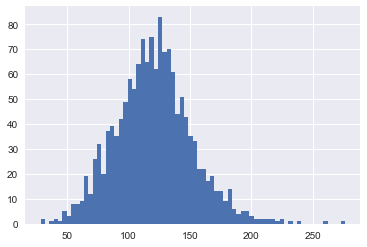

In [20]:
df['PricePrSF'].hist(bins=70)

In [21]:
df['PricePrSF'].describe()

count    1460.000000
mean      120.572878
std        31.391081
min        28.358738
25%        99.822008
50%       120.099031
75%       138.700041
max       276.250881
Name: PricePrSF, dtype: float64

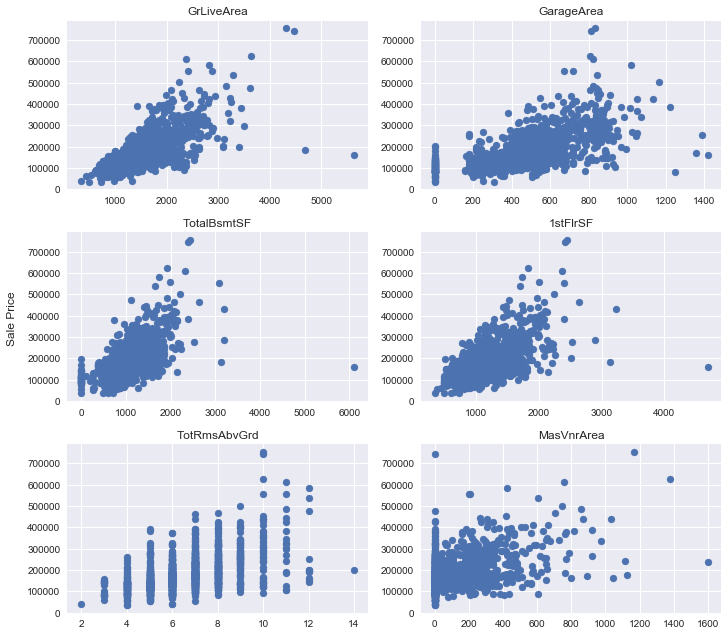

In [22]:
x, axarr = plt.subplots(3, 2, figsize=(10, 9))
price = df.SalePrice.values
axarr[0, 0].scatter(df.GrLivArea.values, price)
axarr[0, 0].set_title('GrLiveArea')
axarr[0, 1].scatter(df.GarageArea.values, price)
axarr[0, 1].set_title('GarageArea')
axarr[1, 0].scatter(df.TotalBsmtSF.values, price)
axarr[1, 0].set_title('TotalBsmtSF')
axarr[1, 1].scatter(df['1stFlrSF'].values, price)
axarr[1, 1].set_title('1stFlrSF')
axarr[2, 0].scatter(df.TotRmsAbvGrd.values, price)
axarr[2, 0].set_title('TotRmsAbvGrd')
axarr[2, 1].scatter(df.MasVnrArea.values, price)
axarr[2, 1].set_title('MasVnrArea')
x.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

### Categories Visualizations

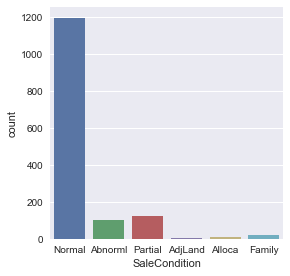

In [23]:
sns.factorplot('SaleCondition',data=df,kind="count")

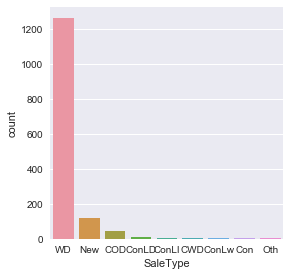

In [24]:
sns.factorplot('SaleType',data=df,kind="count")

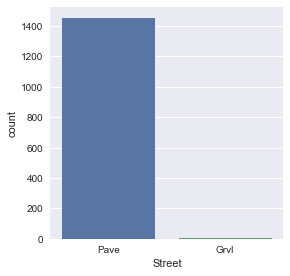

In [25]:
sns.factorplot('Street',data=df,kind="count")

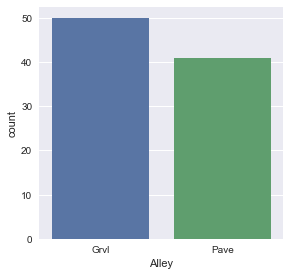

In [26]:
sns.factorplot('Alley',data=df,kind="count")

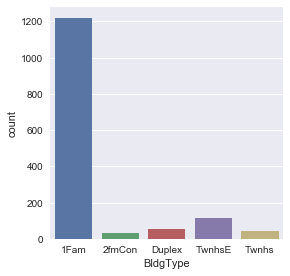

In [27]:
sns.factorplot('BldgType',data=df,kind="count")

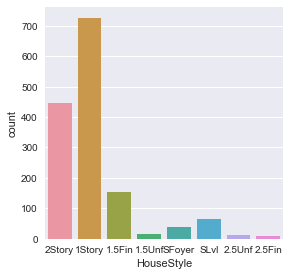

In [28]:
sns.factorplot('HouseStyle',data=df,kind="count")

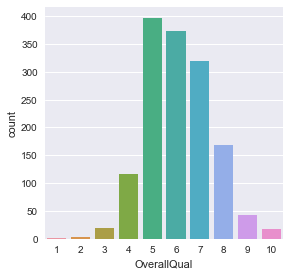

In [29]:
sns.factorplot('OverallQual',data=df,kind="count")

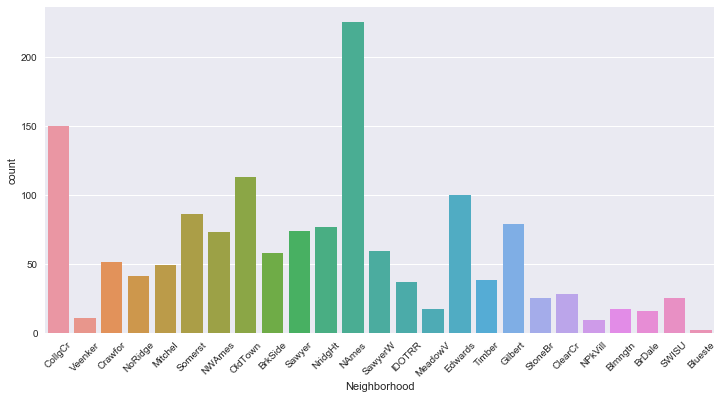

In [30]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Neighborhood', data = df)
xt = plt.xticks(rotation=45)

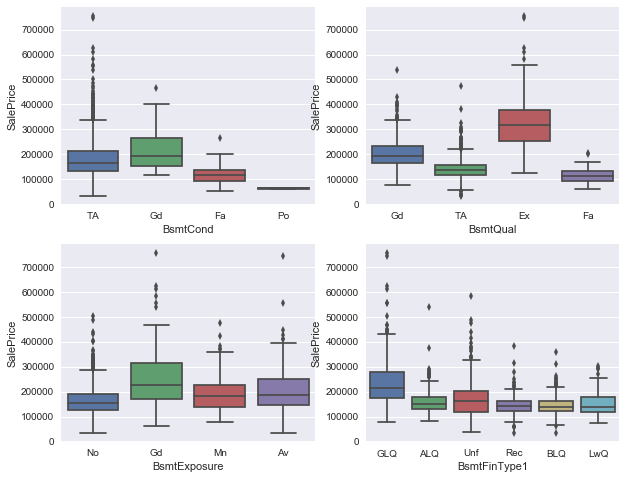

In [31]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))
sns.boxplot('BsmtCond', 'SalePrice', data = df, ax = ax[0, 0])
sns.boxplot('BsmtQual', 'SalePrice', data = df, ax = ax[0, 1])
sns.boxplot('BsmtExposure', 'SalePrice', data = df, ax = ax[1, 0])
sns.boxplot('BsmtFinType1', 'SalePrice', data = df, ax = ax[1, 1])

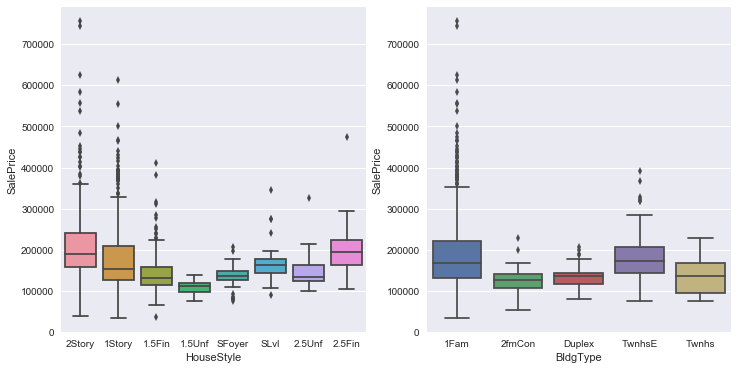

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (12,6))
sns.boxplot('HouseStyle', 'SalePrice', data = df, ax = ax[0])
sns.boxplot('BldgType', 'SalePrice', data = df, ax = ax[1])

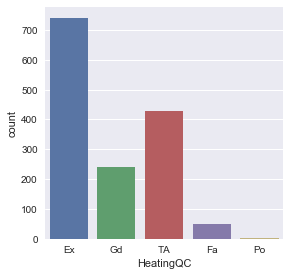

In [33]:
sns.factorplot('HeatingQC',data=df,kind="count")

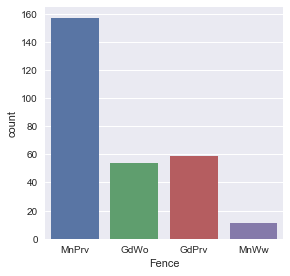

In [34]:
sns.factorplot('Fence',data=df,kind="count")

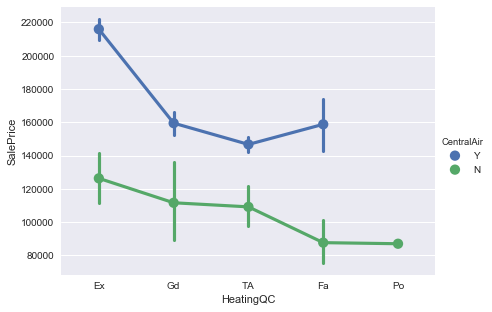

In [35]:
sns.factorplot('HeatingQC', 'SalePrice', hue = 'CentralAir', estimator = np.mean, data = df, 
             size = 4.5, aspect = 1.4)

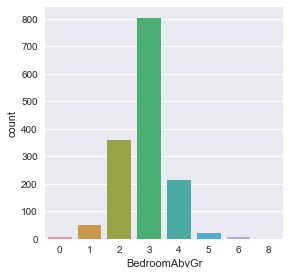

In [36]:
sns.factorplot('BedroomAbvGr',data=df,kind="count")

<hr>

<section id="missing"></section>
## Missing Values

In [37]:
train = df

# Joining train and test
features = pd.concat([train, test], keys=['train', 'test'])

### Finding Missing Values

In [38]:
features.isnull().sum().sort_values(ascending=False).head(35)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
PricePrSF       1459
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Exterior2nd        1
KitchenQual        1
Electrical         1
Exterior1st        1
GarageCars         1
TotalBsmtSF        1
GarageArea         1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
dtype: int64

### Replacing Missing Values

In [39]:
# Removing Outliers
features.drop(features[(features['GrLivArea']>4000) & (features['SalePrice']<300000)].index)

# For these missing features missing values likely mean it doesn't exist
features['PoolQC'] = features['PoolQC'].fillna('None')
features['MiscFeature'] = features['MiscFeature'].fillna('None')
features['Alley'] = features['Alley'].fillna('None')
features['Fence'] = features['Fence'].fillna('None')
features['FireplaceQu'] = features['FireplaceQu'].fillna('None')
features['GarageType'] = features['GarageType'].fillna('None')
features['GarageFinish'] = features['GarageFinish'].fillna('None')
features['GarageQual'] = features['GarageQual'].fillna('None')
features['GarageCond'] = features['GarageCond'].fillna('None')
features['BsmtQual'] = features['BsmtQual'].fillna('None')
features['BsmtCond'] = features['BsmtCond'].fillna('None')
features['BsmtExposure'] = features['BsmtExposure'].fillna('None')
features['BsmtFinType1'] = features['BsmtFinType1'].fillna('None')
features['BsmtFinType2'] = features['BsmtFinType2'].fillna('None')
features['MasVnrType'] = features['MasVnrType'].fillna('None')
features['MSSubClass'] = features['MSSubClass'].fillna('None')


# Fill missing with 0
features['TotalBsmtSF'] = features['TotalBsmtSF'].fillna(0)
features['GarageYrBlt'] = features['GarageYrBlt'].fillna(0)
features['GarageArea'] = features['GarageArea'].fillna(0.0)
features['GarageCars'] = features['GarageCars'].fillna(0.0)
features['MasVnrArea'] = features['MasVnrArea'].fillna(0.0)
features['BsmtFullBath'] = features['BsmtFullBath'].fillna(0)
features['BsmtHalfBath'] = features['BsmtHalfBath'].fillna(0)
features['BsmtUnfSF'] = features['BsmtUnfSF'].fillna(0)
features['BsmtFinSF1'] = features['BsmtFinSF1'].fillna(0)
features['BsmtFinSF2'] = features['BsmtFinSF2'].fillna(0)

# Replace with mode
features['MSZoning'] = features['MSZoning'].fillna(features['MSZoning'].mode()[0])
features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])
features['KitchenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])
features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])
features['Functional'] = features['Functional'].fillna(features['Functional'].mode()[0])
features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
features['Utilities'] = features['Utilities'].fillna(features['Utilities'].mode()[0])

# Replace with median
features['LotFrontage'] = features['LotFrontage'].fillna(features['LotFrontage'].median())

# Adding total sqfootage 
features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']

# Dropping SF
features = features.drop(['TotalBsmtSF'], axis=1)
features = features.drop(['1stFlrSF'], axis=1)
features = features.drop(['2ndFlrSF'], axis=1)


In [40]:
features.dtypes.value_counts()

object     43
int64      24
float64    13
dtype: int64

In [41]:
features.isnull().sum().sort_values(ascending=False).head(3)

SalePrice     1459
PricePrSF     1459
Functional       0
dtype: int64

In [42]:
features.shape

(2919, 80)

<hr>

<section id="predicting"></section>
## Predicting Sales Prices

### Replacing Categorical

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import mean_squared_log_error, mean_squared_error, make_scorer, mean_absolute_error

# Models
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import ExtraTreeRegressor, DecisionTreeRegressor
from sklearn.svm import SVR
from civismlext.stacking import StackedRegressor

# Stacking
from civismlext.nonnegative import NonNegativeLinearRegression

# Xgboost
import xgboost as xgb

### Encoding Categories

In [45]:
le = LabelEncoder()
features['BldgType'] = le.fit_transform(features['BldgType'])
features['BsmtCond'] = le.fit_transform(features['BsmtCond'])
features['BsmtExposure'] = le.fit_transform(features['BsmtExposure'])
features['BsmtFinType1'] = le.fit_transform(features['BsmtFinType1'])
features['BsmtFinType2'] = le.fit_transform(features['BsmtFinType2'])
features['BsmtQual'] = le.fit_transform(features['BsmtQual'])
features['CentralAir'] = le.fit_transform(features['CentralAir'])
features['Condition1'] = le.fit_transform(features['Condition1'])
features['Condition2'] = le.fit_transform(features['Condition2'])
features['Electrical'] = le.fit_transform(features['Electrical'])
features['ExterCond'] = le.fit_transform(features['ExterCond'])
features['ExterQual'] = le.fit_transform(features['ExterQual'])
features['Exterior1st'] = le.fit_transform(features['Exterior1st'])
features['Exterior2nd'] = le.fit_transform(features['Exterior2nd'])
features['FireplaceQu'] = le.fit_transform(features['FireplaceQu'])
features['Foundation'] = le.fit_transform(features['Foundation'])
features['Functional'] = le.fit_transform(features['Functional'])
features['GarageCond'] = le.fit_transform(features['GarageCond'])
features['GarageFinish'] = le.fit_transform(features['GarageFinish'])
features['GarageQual'] = le.fit_transform(features['GarageQual'])
features['GarageType'] = le.fit_transform(features['GarageType'])
features['Heating'] = le.fit_transform(features['Heating'])
features['HeatingQC'] = le.fit_transform(features['HeatingQC'])
features['HouseStyle'] = le.fit_transform(features['HouseStyle'])
features['KitchenQual'] = le.fit_transform(features['KitchenQual'])
features['LandContour'] = le.fit_transform(features['LandContour'])
features['LandSlope'] = le.fit_transform(features['LandSlope'])
features['LotConfig'] = le.fit_transform(features['LotConfig'])
features['LotShape'] = le.fit_transform(features['LotShape'])
features['MSZoning'] = le.fit_transform(features['MSZoning'])
features['MasVnrType'] = le.fit_transform(features['MasVnrType'])
features['Neighborhood'] = le.fit_transform(features['Neighborhood'])
features['PavedDrive'] = le.fit_transform(features['PavedDrive'])
features['RoofMatl'] = le.fit_transform(features['RoofMatl'])
features['RoofStyle'] = le.fit_transform(features['RoofStyle'])
features['SaleCondition'] = le.fit_transform(features['SaleCondition'])
features['SaleType'] = le.fit_transform(features['SaleType'])
features['Street'] = le.fit_transform(features['Street'])
features['Utilities'] = le.fit_transform(features['Utilities'])
features['Fence'] = le.fit_transform(features['Fence'])
features['Alley'] = le.fit_transform(features['Alley'])
features['MiscFeature'] = le.fit_transform(features['MiscFeature'])
features['PoolQC'] = le.fit_transform(features['PoolQC'])
features['MSSubClass'] = le.fit_transform(features['MSSubClass'])

### Splitting the Data

In [46]:
train = features.loc['train']
test = features.loc['test']

test = test.drop(['SalePrice'], axis=1)
test = test.drop(['PricePrSF'], axis=1)
train = train.drop(['PricePrSF'], axis=1)

In [47]:
print(train.shape)
print(test.shape)

(1460, 79)
(1459, 78)


In [48]:
# Splitting the data

X = train.drop(['SalePrice'], axis=1)
y = train.SalePrice

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4,test_size=0.2)

### XGBoost

In [50]:
xgb_model = xgb.XGBRegressor(n_estimators=400, n_jobs=-1, nthread=-1)

In [51]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=-1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [52]:
xgb_model.score(X_train,y_train)

0.99055935572257658

In [53]:
xgb_model.score(X_test,y_test)

0.9067357117655106

### Random Forest

In [54]:
rf = RandomForestRegressor(random_state=4, n_estimators=4000, n_jobs=-1)
rf.fit(X_train, y_train.ravel()) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=4000, n_jobs=-1,
           oob_score=False, random_state=4, verbose=0, warm_start=False)

In [55]:
rf.score(X_train,y_train)

0.97870298346437612

In [56]:
rf.score(X_test,y_test)

0.89754284659470429

### Adabooster

In [57]:
ada = AdaBoostRegressor(n_estimators=400, learning_rate=0.1)

In [58]:
ada.fit(X_train, y_train.ravel()) 

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
         n_estimators=400, random_state=None)

In [59]:
ada.score(X_train,y_train)

0.89107434452744327

In [60]:
ada.score(X_test,y_test)

0.81830648053759703

### Non Negative Linear Regression

In [61]:
nn = NonNegativeLinearRegression(fit_intercept=True, normalize=False)

In [62]:
nn.fit(X_train, y_train)

NonNegativeLinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [63]:
nn.score(X_train,y_train)

0.80439533094411608

In [64]:
nn.score(X_test,y_test)

0.8470377931909765

### Extra Tree

In [65]:
ex = ExtraTreesRegressor(random_state=4, n_jobs=-1, max_features=50)

In [66]:
ex.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features=50, max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
          oob_score=False, random_state=4, verbose=0, warm_start=False)

In [67]:
ex.score(X_train,y_train)

1.0

In [68]:
ex.score(X_test,y_test)

0.88077457411567439

### ElasticNetCV

In [69]:
en = ElasticNetCV(random_state=4, n_jobs=-1, alphas=[0.1, 1, 10, 100], cv=5)

In [70]:
en.fit(X_train, y_train)

ElasticNetCV(alphas=[0.1, 1, 10, 100], copy_X=True, cv=5, eps=0.001,
       fit_intercept=True, l1_ratio=0.5, max_iter=1000, n_alphas=100,
       n_jobs=-1, normalize=False, positive=False, precompute='auto',
       random_state=4, selection='cyclic', tol=0.0001, verbose=0)

In [71]:
en.score(X_train,y_train)

0.84280099637887151

In [72]:
en.score(X_test,y_test)

0.86836119537722956

### Combined Model

In [73]:
models = [
    ('ada', ada),
    ('en', en),
    ('nn', nn),
    ('ex', ex),
    ('rf', rf),
]

In [74]:
stack = StackedRegressor(models, n_jobs=-1)

In [75]:
stack.fit(X_train, y_train)

StackedRegressor(cv=3,
         estimator_list=[('ada', AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
         n_estimators=400, random_state=None)), ('en', ElasticNetCV(alphas=[0.1, 1, 10, 100], copy_X=True, cv=5, eps=0.001,
       fit_intercept=True, l1_ratio=0.5, max_iter=1000, n_alphas=100,
       n_...timators=4000, n_jobs=-1,
           oob_score=False, random_state=4, verbose=0, warm_start=False))],
         n_jobs=-1, pre_dispatch='2*n_jobs', verbose=0)

In [76]:
stack.score(X_train,y_train)

0.92923192604134131

In [77]:
stack.score(X_test,y_test)

0.88296822631576466

In [78]:
XGB_model = xgb_model.fit(X_train, y_train)

In [79]:
y_pred = stack.predict(X_test)

print('MAE:\t$%.2f' % mean_absolute_error(y_test, y_pred))
print('MSLE:\t%.5f' % mean_squared_log_error(y_test, y_pred))

MAE:	$16780.72
MSLE:	0.01577


In [80]:
predictions = XGB_model.predict(test)*0.30 + stack.predict(test)*0.70

In [81]:
submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predictions})    

In [82]:
submission.to_csv('submissions.csv', index=False)